In [23]:
from pathlib import Path
import numpy as np
from PIL import Image
import pandas as pd
import scanpy
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
import scanpy as sc
from sklearn.decomposition import PCA
from umap import UMAP
from tqdm import tqdm
import squidpy as sq
import re

In [21]:
current_folder = globals()["_dh"][0]
image_dir = current_folder / ".." / ".." / "data" / "raw" / "visium"
processed_dir = current_folder / ".." / ".." / "data" / "uscsc_dump" 
samples = [f for f in os.listdir(processed_dir) if f.startswith("visium_")]
samples

['visium_MS197D.h5ad',
 'visium_MS94.h5ad',
 'visium_MS497I.h5ad',
 'visium_CO85.h5ad',
 'visium_MS377I.h5ad',
 'visium_MS466.h5ad',
 'visium_MS377T.h5ad',
 'visium_CO74.h5ad',
 'visium_MS411.h5ad',
 'visium_MS229.h5ad',
 'visium_MS197U.h5ad',
 'visium_CO40.h5ad',
 'visium_CO96.h5ad',
 'visium_MS371.h5ad',
 'visium_MS549H.h5ad',
 'visium_MS549T.h5ad',
 'visium_MS497T.h5ad']

In [24]:
sample = samples[0]
base_name = re.sub(r"\.h5ad$", "", sample)
base_name = re.sub(r"^visium_", "", base_name)
print(base_name)
annotated_file = processed_dir / ("visium_" + base_name + ".h5ad")
adata = sc.read_h5ad(annotated_file)

MS197D


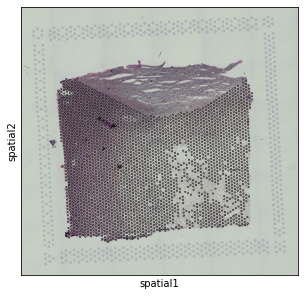

In [29]:
np.set_printoptions(threshold=10)
img = adata.uns["spatial"][base_name]["images"]["hires"]
img = sq.im.ImageContainer(img, layer="img1")
sq.pl.spatial_scatter(adata, outline=True, size=0.3)

In [30]:
# how can one make this work? I don't have the orginal resolution image
#sq.im.calculate_image_features(adata, img, features="summary", key_added="features", show_progress_bar=False)

ValueError: Expected `height` to be in interval `[0, 1938]`, found `4796`.